In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [91]:
#df = pd.read_csv("train_processed.csv")
df2 = pd.read_csv("./data/train_processed_encoded_balanced.csv", index_col=0)
X = pd.read_csv('./data/x.csv', index_col=0)
y_ds_un= pd.read_csv('./data/y_ds.csv', index_col=0)
X_gd = pd.read_csv('./data/x_gd_resampled.csv', index_col=0)
y_gd = pd.read_csv('./data/y_gd_resampled.csv', index_col=0)
X_ds = pd.read_csv('./data/x_ds_resampled.csv', index_col=0)
y_ds = pd.read_csv('./data/y_ds_resampled.csv', index_col=0)
X_ds2 = pd.read_csv('./data/x_ds+gd_edit_resampled.csv', index_col=0)
y_ds2 = pd.read_csv('./data/y_ds+gd_edit_resampled.csv', index_col=0)
X_gdds = pd.read_csv('./data/x_gdds_resampled.csv', index_col=0)
y_gdds = pd.read_csv('./data/y_gdds_resampled.csv', index_col=0)
X_gdds2 = pd.read_csv('./data/x_gdds2_edit_resampled.csv', index_col=0)
y_gdds2 = pd.read_csv('./data/y_gdds2_edit_resampled.csv', index_col=0)

In [116]:
X_gdds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 0 to 17499
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       17500 non-null  float64
 1   Genes in mother's side                            17500 non-null  float64
 2   Inherited from father                             17500 non-null  float64
 3   Maternal gene                                     17500 non-null  float64
 4   Paternal gene                                     17500 non-null  float64
 5   Blood cell count (mcL)                            17500 non-null  float64
 6   Mother's age                                      17500 non-null  float64
 7   Father's age                                      17500 non-null  float64
 8   Status                                            17500 non-null  float64
 9   Respiratory Rate 

In [92]:
X.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,-1.128463,0.829238,-0.797596,0.802715,-0.870854,-0.693956,-0.853643,-1.086047,-0.998339,-0.900493,...,0.897342,0.000035,0.908367,0.942378,1.162632,0.766328,0.827148,0.857458,1.112873,1.192865
1,-0.657008,0.829238,1.253709,-1.245714,-0.870854,0.057669,-0.853643,-0.883431,1.001617,1.110451,...,0.897342,0.000035,-1.100825,-0.777460,0.294673,0.766328,0.827148,0.857458,1.112873,-0.838278
2,-0.185554,0.829238,-0.797596,-1.245714,-0.870854,-0.029341,0.973622,-0.950970,-0.998339,-0.900493,...,0.897342,1.490541,0.908367,-0.002017,0.294673,-1.304863,0.827148,0.857458,1.112873,1.192865
3,1.228809,0.829238,-0.797596,0.802715,-0.870854,-0.971047,-1.056673,-1.086047,1.001617,1.110451,...,0.897342,-0.745218,0.908367,0.173414,-0.573287,-1.304863,-1.208916,0.857458,-0.898533,-0.838278
4,1.700263,0.829238,-0.797596,0.802715,-0.870854,1.021928,-0.853643,-1.086047,1.001617,-0.900493,...,-1.114351,-1.490472,-1.100825,1.106891,0.294673,0.766328,-1.208916,-1.166184,1.112873,-0.838278


In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

def compute_metrics(actual, predicted):
    #tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    confmat = confusion_matrix(actual, predicted)
    print("Accuracy: " + str(accuracy_score(actual, predicted)))
    print(classification_report(actual, predicted, zero_division=0))
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat)
    disp.plot()


In [94]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_gd, y_gd, test_size=0.30, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ds, y_ds, test_size=0.30, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_gdds, y_gdds, test_size=0.30, random_state=42)

## Predicting Genetic Disorder

/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5697303566251087
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      0.38      0.44      2290
Multifactorial genetic inheritance disorders       0.68      0.86      0.76      2324
            Single-gene inheritance diseases       0.47      0.46      0.46      2284

                                    accuracy                           0.57      6898
                                   macro avg       0.55      0.57      0.55      6898
                                weighted avg       0.55      0.57      0.56      6898



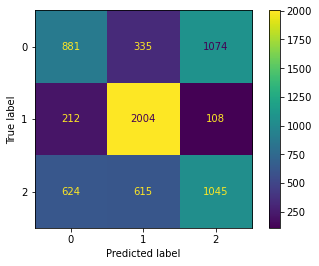

In [95]:
from sklearn.linear_model import LogisticRegression

logRegression = LogisticRegression()
logRegression.fit(X_train1, y_train1)
compute_metrics(y_test1, logRegression.predict(X_test1))

Accuracy: 0.6046680197158597
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.52      0.52      0.52      2290
Multifactorial genetic inheritance disorders       0.80      0.81      0.80      2324
            Single-gene inheritance diseases       0.49      0.48      0.48      2284

                                    accuracy                           0.60      6898
                                   macro avg       0.60      0.60      0.60      6898
                                weighted avg       0.60      0.60      0.60      6898



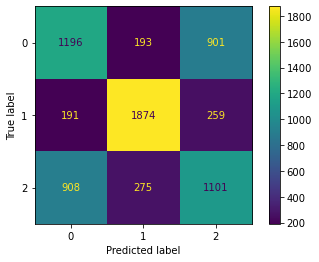

In [96]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train1, y_train1)
compute_metrics(y_test1, decisionTree.predict(X_test1))

<ipython-input-97-83cc24ab388d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train1, y_train1)


Accuracy: 0.6788924325891563
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.58      0.62      0.60      2290
Multifactorial genetic inheritance disorders       0.87      0.90      0.89      2324
            Single-gene inheritance diseases       0.57      0.51      0.54      2284

                                    accuracy                           0.68      6898
                                   macro avg       0.67      0.68      0.67      6898
                                weighted avg       0.67      0.68      0.68      6898



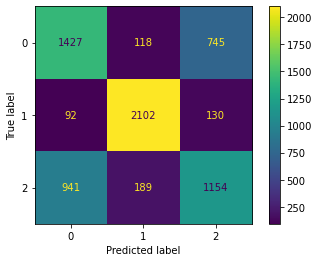

In [97]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_train1, y_train1)
compute_metrics(y_test1, randomForest.predict(X_test1))

/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1075: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:676: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.6680197158596695
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.60      0.60      0.60      2290
Multifactorial genetic inheritance disorders       0.80      0.90      0.85      2324
            Single-gene inheritance diseases       0.57      0.49      0.53      2284

                                    accuracy                           0.67      6898
                                   macro avg       0.66      0.67      0.66      6898
                                weighted avg       0.66      0.67      0.66      6898



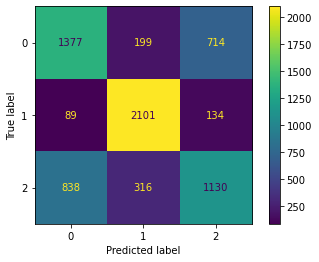

In [98]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train1, y_train1)
compute_metrics(y_test1, clf.predict(X_test1))

/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6639605682806611
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.58      0.67      0.62      2290
Multifactorial genetic inheritance disorders       0.81      0.90      0.85      2324
            Single-gene inheritance diseases       0.58      0.42      0.49      2284

                                    accuracy                           0.66      6898
                                   macro avg       0.65      0.66      0.65      6898
                                weighted avg       0.66      0.66      0.65      6898



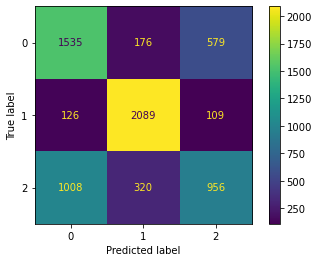

In [99]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train1, y_train1)
compute_metrics(y_test1, svc.predict(X_test1))

## Predicting Subclass

In [100]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(random_state=42)
X_train2, y_train2 = over_sampler.fit_resample(X_train2, y_train2)

/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.44063492063492066
                                     precision    recall  f1-score   support

                    Cystic fibrosis       0.42      0.45      0.44       887
                           Diabetes       0.42      0.32      0.36       896
                    Hemochromatosis       0.56      0.68      0.62       954
Leber's hereditary optic neuropathy       0.57      0.70      0.63       888
                     Leigh syndrome       0.35      0.36      0.35       898
             Mitochondrial myopathy       0.33      0.24      0.28       919
                          Tay-Sachs       0.33      0.32      0.33       858

                           accuracy                           0.44      6300
                          macro avg       0.43      0.44      0.43      6300
                       weighted avg       0.43      0.44      0.43      6300



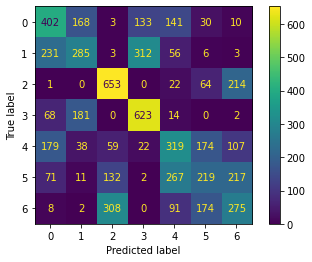

In [101]:
logRegression = LogisticRegression()
logRegression.fit(X_train2, y_train2)
compute_metrics(y_test2, logRegression.predict(X_test2))

Accuracy: 0.4380952380952381
                                     precision    recall  f1-score   support

                    Cystic fibrosis       0.34      0.35      0.35       887
                           Diabetes       0.49      0.47      0.48       896
                    Hemochromatosis       0.67      0.64      0.65       954
Leber's hereditary optic neuropathy       0.70      0.75      0.72       888
                     Leigh syndrome       0.25      0.24      0.25       898
             Mitochondrial myopathy       0.28      0.27      0.27       919
                          Tay-Sachs       0.32      0.34      0.33       858

                           accuracy                           0.44      6300
                          macro avg       0.44      0.44      0.44      6300
                       weighted avg       0.44      0.44      0.44      6300



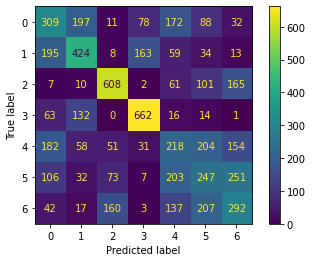

In [102]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train2, y_train2)
compute_metrics(y_test2, decisionTree.predict(X_test2))

<ipython-input-103-528c26c4d368>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train2, y_train2)


Accuracy: 0.55
                                     precision    recall  f1-score   support

                    Cystic fibrosis       0.46      0.55      0.50       887
                           Diabetes       0.68      0.61      0.64       896
                    Hemochromatosis       0.76      0.77      0.76       954
Leber's hereditary optic neuropathy       0.84      0.89      0.86       888
                     Leigh syndrome       0.35      0.27      0.30       898
             Mitochondrial myopathy       0.32      0.29      0.31       919
                          Tay-Sachs       0.40      0.47      0.43       858

                           accuracy                           0.55      6300
                          macro avg       0.54      0.55      0.54      6300
                       weighted avg       0.55      0.55      0.55      6300



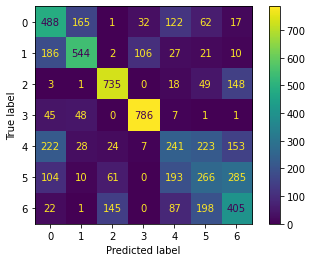

In [103]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train2, y_train2)
compute_metrics(y_test2, randomForest.predict(X_test2))

/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1075: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:676: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.49174603174603176
                                     precision    recall  f1-score   support

                    Cystic fibrosis       0.42      0.43      0.42       887
                           Diabetes       0.55      0.56      0.55       896
                    Hemochromatosis       0.63      0.73      0.68       954
Leber's hereditary optic neuropathy       0.76      0.84      0.80       888
                     Leigh syndrome       0.31      0.23      0.27       898
             Mitochondrial myopathy       0.29      0.26      0.27       919
                          Tay-Sachs       0.36      0.38      0.37       858

                           accuracy                           0.49      6300
                          macro avg       0.47      0.49      0.48      6300
                       weighted avg       0.48      0.49      0.48      6300



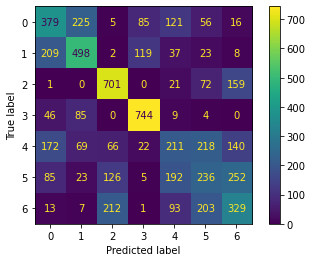

In [104]:
mlp = MLPClassifier()
mlp.fit(X_train2, y_train2)
compute_metrics(y_test2, mlp.predict(X_test2))

/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5314285714285715
                                     precision    recall  f1-score   support

                    Cystic fibrosis       0.46      0.54      0.49       887
                           Diabetes       0.64      0.56      0.60       896
                    Hemochromatosis       0.69      0.75      0.72       954
Leber's hereditary optic neuropathy       0.80      0.86      0.83       888
                     Leigh syndrome       0.33      0.29      0.31       898
             Mitochondrial myopathy       0.33      0.27      0.30       919
                          Tay-Sachs       0.40      0.45      0.42       858

                           accuracy                           0.53      6300
                          macro avg       0.52      0.53      0.52      6300
                       weighted avg       0.52      0.53      0.53      6300



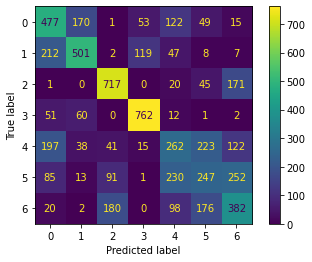

In [105]:
svc = SVC()
svc.fit(X_train2, y_train2)
compute_metrics(y_test2, svc.predict(X_test2))

# Predicting Disorder + Subclass

/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.31942857142857145
                                                                                   precision    recall  f1-score   support

                    Mitochondrial genetic inheritance disorders - Cystic fibrosis       0.31      0.17      0.22       418
Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy       0.50      0.48      0.49       424
                     Mitochondrial genetic inheritance disorders - Leigh syndrome       0.27      0.35      0.31       627
             Mitochondrial genetic inheritance disorders - Mitochondrial myopathy       0.27      0.24      0.26       633
                          Mitochondrial genetic inheritance disorders - Tay-Sachs       0.30      0.27      0.28       416
                          Multifactorial genetic inheritance disorders - Diabetes       0.36      0.44      0.40       642
                               Single-gene inheritance diseases - Cystic fibrosis       0.29      0.35      

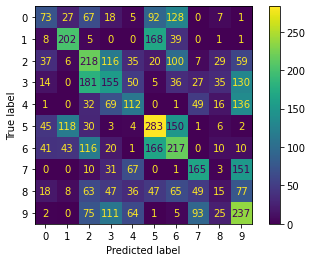

In [106]:
logRegression = LogisticRegression()
logRegression.fit(X_train3, y_train3)
compute_metrics(y_test3, logRegression.predict(X_test3))

Accuracy: 0.3401904761904762
                                                                                   precision    recall  f1-score   support

                    Mitochondrial genetic inheritance disorders - Cystic fibrosis       0.54      0.55      0.54       418
Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy       0.49      0.50      0.50       424
                     Mitochondrial genetic inheritance disorders - Leigh syndrome       0.21      0.21      0.21       627
             Mitochondrial genetic inheritance disorders - Mitochondrial myopathy       0.22      0.23      0.22       633
                          Mitochondrial genetic inheritance disorders - Tay-Sachs       0.64      0.66      0.65       416
                          Multifactorial genetic inheritance disorders - Diabetes       0.36      0.34      0.35       642
                               Single-gene inheritance diseases - Cystic fibrosis       0.29      0.29      0

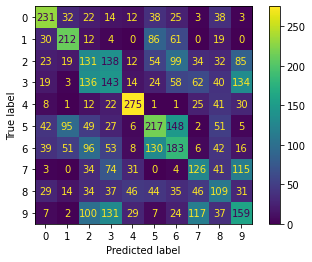

In [107]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train3, y_train3)
compute_metrics(y_test3, decisionTree.predict(X_test3))

<ipython-input-108-fcefb1d5c135>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train3, y_train3)


Accuracy: 0.4796190476190476
                                                                                   precision    recall  f1-score   support

                    Mitochondrial genetic inheritance disorders - Cystic fibrosis       0.85      0.80      0.82       418
Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy       0.76      0.70      0.73       424
                     Mitochondrial genetic inheritance disorders - Leigh syndrome       0.27      0.30      0.28       627
             Mitochondrial genetic inheritance disorders - Mitochondrial myopathy       0.27      0.27      0.27       633
                          Mitochondrial genetic inheritance disorders - Tay-Sachs       0.84      0.86      0.85       416
                          Multifactorial genetic inheritance disorders - Diabetes       0.51      0.55      0.53       642
                               Single-gene inheritance diseases - Cystic fibrosis       0.34      0.40      0

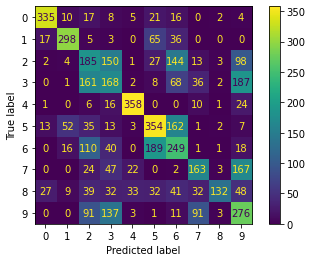

In [108]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train3, y_train3)
compute_metrics(y_test3, randomForest.predict(X_test3))

/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1075: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:676: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.4045714285714286
                                                                                   precision    recall  f1-score   support

                    Mitochondrial genetic inheritance disorders - Cystic fibrosis       0.63      0.71      0.67       418
Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy       0.56      0.54      0.55       424
                     Mitochondrial genetic inheritance disorders - Leigh syndrome       0.28      0.33      0.30       627
             Mitochondrial genetic inheritance disorders - Mitochondrial myopathy       0.29      0.22      0.25       633
                          Mitochondrial genetic inheritance disorders - Tay-Sachs       0.60      0.81      0.69       416
                          Multifactorial genetic inheritance disorders - Diabetes       0.42      0.41      0.42       642
                               Single-gene inheritance diseases - Cystic fibrosis       0.32      0.34      0

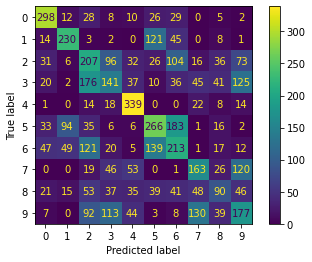

In [109]:
mlp = MLPClassifier()
mlp.fit(X_train3, y_train3)
compute_metrics(y_test3, mlp.predict(X_test3))

/Users/lucasmarch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.46095238095238095
                                                                                   precision    recall  f1-score   support

                    Mitochondrial genetic inheritance disorders - Cystic fibrosis       0.87      0.78      0.82       418
Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy       0.69      0.62      0.65       424
                     Mitochondrial genetic inheritance disorders - Leigh syndrome       0.29      0.37      0.33       627
             Mitochondrial genetic inheritance disorders - Mitochondrial myopathy       0.29      0.27      0.28       633
                          Mitochondrial genetic inheritance disorders - Tay-Sachs       0.79      0.81      0.80       416
                          Multifactorial genetic inheritance disorders - Diabetes       0.49      0.51      0.50       642
                               Single-gene inheritance diseases - Cystic fibrosis       0.37      0.43      

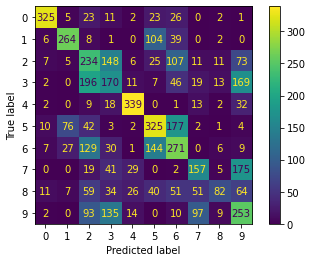

In [110]:
svc = SVC()
svc.fit(X_train3, y_train3)
compute_metrics(y_test3, svc.predict(X_test3))